In [88]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [89]:
os.chdir(r"C:\Users\admim\Downloads")

In [90]:
os.listdir()

['.ipynb_checkpoints',
 '164922241976960ec2379f8793842aa5b168a_.zip',
 '165122095024660ec2379f8793842aa5b168a_',
 '165122534897360ec2379f8793842aa5b168a_.zip',
 '165408461178060ec2379f8793842aa5b168a_',
 '165408527393260ec2379f8793842aa5b168a_.zip',
 '165408581174360ec2379f8793842aa5b168a_.zip',
 '2-In-class Exercise',
 '3-In class Exercise',
 '62c6d7f7e88ed406e8f7ffbc_1659081178601_sakshi test1.sql',
 '62c6d7f7e88ed406e8f7ffbc_1660646126777_sakshi test 2.ipynb',
 'act_pred_train.xlsx',
 'Anaconda3-2022.05-Windows-x86_64.exe',
 'archive',
 'archive.zip',
 'assignmentonpandas',
 'assignmentonpandas.rar',
 'bank.xlsx',
 'Banks_full.csv',
 'Bank_Account_Details.csv',
 'BANK_ACCOUNT_TRANSACTION.csv',
 'Bank_customer.csv',
 'Books _ text book on Stats.pdf',
 'car data.csv',
 'Car details v3.csv',
 'car_done.csv',
 'CaseStudy (1).zip',
 'CaseStudy (2).zip',
 'CaseStudy.zip',
 'cds',
 'ChromeSetup.exe',
 'Conditional_statement_loops.ipynb',
 'corr.xlsx',
 'covid19_sample.csv',
 'Customer.csv'

In [91]:
bank=pd.read_excel("bank.xlsx")

In [92]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [93]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## univariate analysis

In [94]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"value count and %\n",ff)
    sns.countplot(data=data,x=x)
    plt.show()

In [95]:
bank.dtypes[bank.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']
value count and %
                Count percentage
management      2566     22.99%
blue-collar     1944     17.42%
technician      1823     16.33%
admin.          1334     11.95%
services         923      8.27%
retired          778      6.97%
self-employed    405      3.63%
student          360      3.23%
unemployed       357       3.2%
entrepreneur     328      2.94%
housemaid        274      2.45%
unknown           70      0.63%


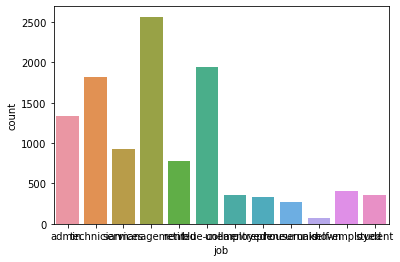

In [96]:
univariate_cat(data=bank, x="job")

In [97]:
bank["job"]=bank["job"].replace(["management","admin."],"white-collar")
bank["job"]=bank["job"].replace(["services","housemaid"],"pink-collar")
bank["job"]=bank["job"].replace(["retired","student","unemployed","unknown"],"others")
bank["job"]=bank["job"].replace(["self-employed","entrepreneur"],"self-depend")

Total missing values : 0

Total count of unique categories: 6

Unique categories :
['white-collar', 'technician', 'pink-collar', 'others', 'blue-collar', 'self-depend']
value count and %
               Count percentage
white-collar   3900     34.94%
blue-collar    1944     17.42%
technician     1823     16.33%
others         1565     14.02%
pink-collar    1197     10.72%
self-depend     733      6.57%


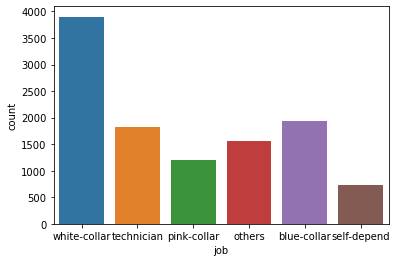

In [98]:
univariate_cat(data=bank,x="job")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['married', 'single', 'divorced']
value count and %
           Count percentage
married    6351      56.9%
single     3518     31.52%
divorced   1293     11.58%


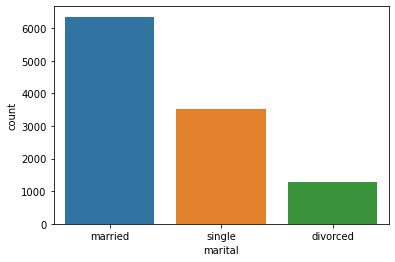

In [99]:
univariate_cat(data=bank,x="marital")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['secondary', 'tertiary', 'primary', 'unknown']
value count and %
            Count percentage
secondary   5476     49.06%
tertiary    3689     33.05%
primary     1500     13.44%
unknown      497      4.45%


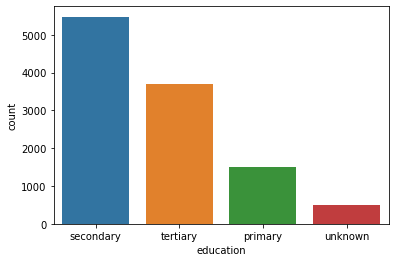

In [100]:
univariate_cat(data=bank,x="education")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
value count and %
      Count percentage
no   10994     98.49%
yes    168      1.51%


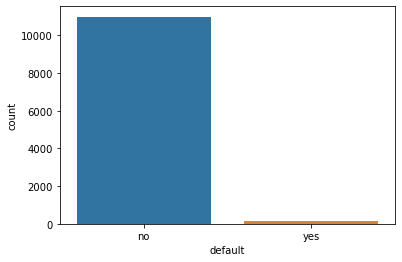

In [101]:
# ''default', 'housing', 'loan', 'contact',
#        'month', 'poutcome', 'deposit'', 'housing', 'loan', 'contact',
#        'month', 'poutcome', 'deposit'
univariate_cat(data=bank,x="default")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
value count and %
      Count percentage
no    5881     52.69%
yes   5281     47.31%


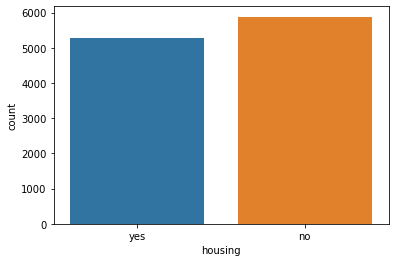

In [102]:
univariate_cat(data=bank,x="housing")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['no', 'yes']
value count and %
      Count percentage
no    9702     86.92%
yes   1460     13.08%


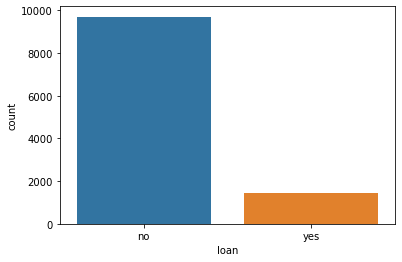

In [103]:
# ,  'loan', 'contact','month', 'poutcome', 'deposit'',  'contact',
#        
univariate_cat(data=bank,x="loan")

Total missing values : 0

Total count of unique categories: 3

Unique categories :
['unknown', 'cellular', 'telephone']
value count and %
            Count percentage
cellular    8042     72.05%
unknown     2346     21.02%
telephone    774      6.93%


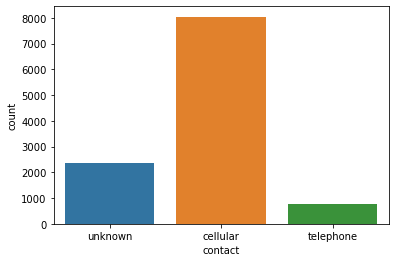

In [104]:
# ,  'month', 'poutcome', 'deposit'',  'contact',
#        
univariate_cat(data=bank,x="contact")

In [105]:
bank[bank["contact"]=="unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,pink-collar,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,white-collar,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,55,pink-collar,divorced,secondary,no,2166,yes,no,unknown,28,may,23,17,-1,0,unknown,no
11144,60,others,married,secondary,no,0,yes,no,unknown,15,may,229,1,-1,0,unknown,no
11148,32,blue-collar,married,secondary,no,1,yes,no,unknown,8,may,102,1,-1,0,unknown,no
11151,40,white-collar,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no


In [106]:
bank[bank["contact"]=="telephone"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
485,31,blue-collar,divorced,secondary,no,-277,yes,no,telephone,17,jul,1008,2,-1,0,unknown,yes
491,33,white-collar,married,secondary,no,0,yes,no,telephone,17,jul,1448,7,-1,0,unknown,yes
518,39,white-collar,married,tertiary,no,1423,yes,no,telephone,21,jul,733,3,-1,0,unknown,yes
522,42,others,married,unknown,no,970,yes,no,telephone,21,jul,691,10,-1,0,unknown,yes
523,56,pink-collar,married,primary,no,486,no,yes,telephone,21,jul,1877,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11066,28,technician,single,secondary,no,2000,no,no,telephone,3,feb,226,2,-1,0,unknown,no
11090,34,pink-collar,single,secondary,no,2257,no,yes,telephone,30,jan,568,2,-1,0,unknown,no
11134,58,self-depend,married,tertiary,no,2596,no,no,telephone,18,nov,15,2,-1,0,unknown,no
11138,32,technician,married,secondary,no,235,yes,no,telephone,28,aug,688,6,-1,0,unknown,no


In [107]:
bank.drop(columns=["contact"],inplace=True)

Total missing values : 0

Total count of unique categories: 12

Unique categories :
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
value count and %
      Count percentage
may   2824      25.3%
aug   1519     13.61%
jul   1514     13.56%
jun   1222     10.95%
nov    943      8.45%
apr    923      8.27%
feb    776      6.95%
oct    392      3.51%
jan    344      3.08%
sep    319      2.86%
mar    276      2.47%
dec    110      0.99%


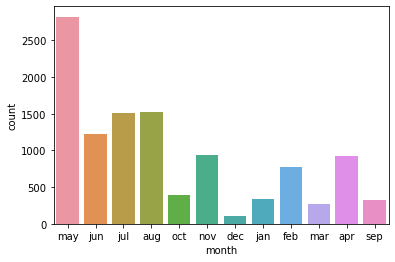

In [108]:
# ,   'poutcome', 'deposit'',  'contact',
#        
univariate_cat(data=bank,x="month")

Total missing values : 0

Total count of unique categories: 4

Unique categories :
['unknown', 'other', 'failure', 'success']
value count and %
          Count percentage
unknown   8326     74.59%
failure   1228      11.0%
success   1071       9.6%
other      537      4.81%


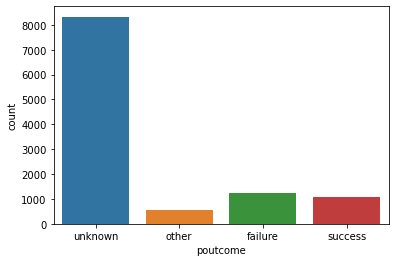

In [109]:
# ,   'poutcome', 'deposit'',  'contact',
#        
univariate_cat(data=bank,x="poutcome")

In [110]:
bank["poutcome"]=bank["poutcome"].replace(["unknown","other"],"other")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['yes', 'no']
value count and %
      Count percentage
no    5873     52.62%
yes   5289     47.38%


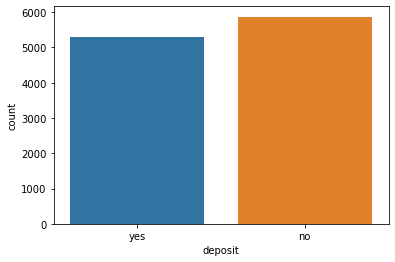

In [111]:
# ,   'poutcome', 'deposit'',  'contact',
#        
univariate_cat(data=bank,x="deposit")

In [112]:
bank["deposit"]=bank["deposit"].map({"yes":1, "no":0})

In [113]:
bank["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [114]:
bank["deposit"].dtypes

dtype('int64')

## univariate on numericals

In [115]:

def univariate_num(data ,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [116]:
bank.dtypes[bank.dtypes!="object"].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

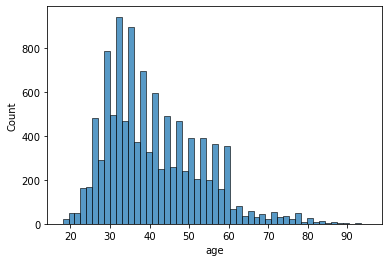

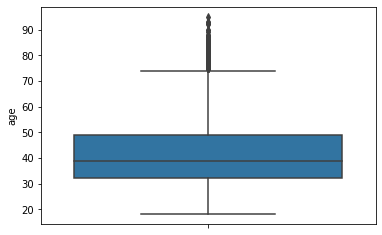

{'missing': 0,
 'min': 18,
 'max': 95,
 'mean': 41.23,
 'var': 141.93,
 'std': 11.91,
 'range': 77,
 'q1': 32.0,
 'q2': 39.0,
 'q3': 49.0,
 'skewness': 0.86,
 'kurtosis': 0.62}

In [117]:
# 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit'

univariate_num(data=bank, x="age")

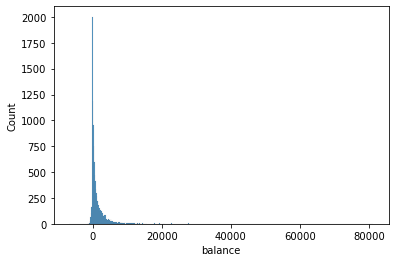

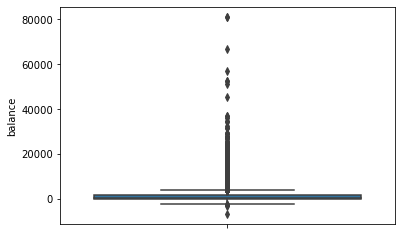

{'missing': 0,
 'min': -6847,
 'max': 81204,
 'mean': 1528.54,
 'var': 10403291.12,
 'std': 3225.41,
 'range': 88051,
 'q1': 122.0,
 'q2': 550.0,
 'q3': 1708.0,
 'skewness': 8.22,
 'kurtosis': 126.86}

In [118]:
# 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit'
univariate_num(data=bank, x="balance")

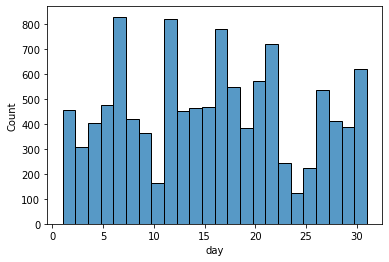

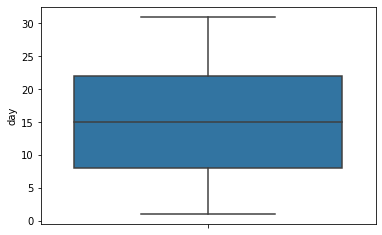

{'missing': 0,
 'min': 1,
 'max': 31,
 'mean': 15.66,
 'var': 70.91,
 'std': 8.42,
 'range': 30,
 'q1': 8.0,
 'q2': 15.0,
 'q3': 22.0,
 'skewness': 0.11,
 'kurtosis': -1.06}

In [119]:
# 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit'
univariate_num(data=bank, x="day")

In [120]:
bank.drop(columns=["day"],inplace=True)

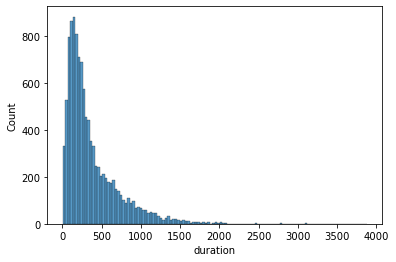

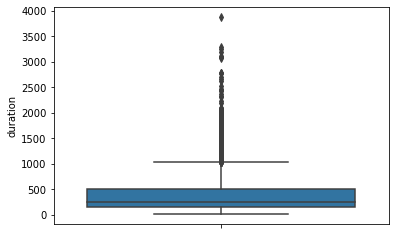

{'missing': 0,
 'min': 2,
 'max': 3881,
 'mean': 371.99,
 'var': 120498.12,
 'std': 347.13,
 'range': 3879,
 'q1': 138.0,
 'q2': 255.0,
 'q3': 496.0,
 'skewness': 2.14,
 'kurtosis': 7.3}

In [121]:
# 'duration', 'campaign', 'pdays', 'previous', 'deposit'
univariate_num(data=bank, x="duration")

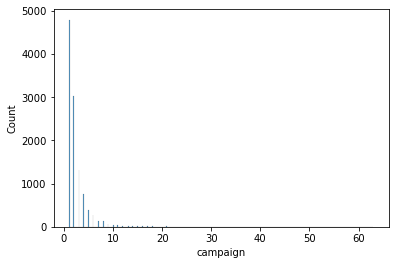

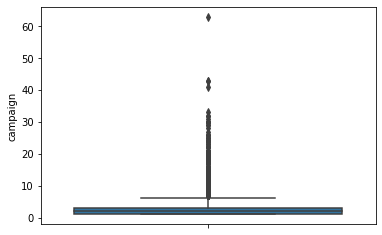

{'missing': 0,
 'min': 1,
 'max': 63,
 'mean': 2.51,
 'var': 7.41,
 'std': 2.72,
 'range': 62,
 'q1': 1.0,
 'q2': 2.0,
 'q3': 3.0,
 'skewness': 5.55,
 'kurtosis': 57.39}

In [122]:
# 'campaign', 'pdays', 'previous', 'deposit'
univariate_num(data=bank, x="campaign")

<AxesSubplot:xlabel='campaign', ylabel='count'>

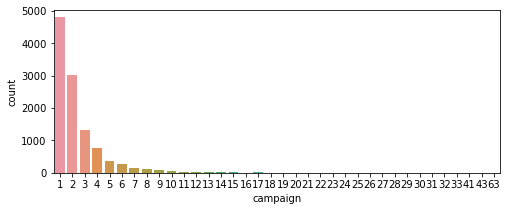

In [123]:
plt.figure(figsize=(8,3))
sns.countplot(data=bank, x="campaign")

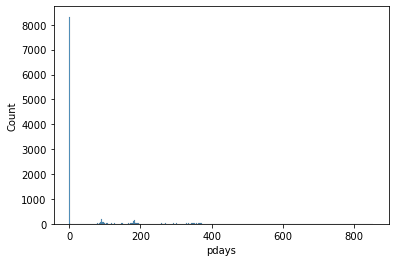

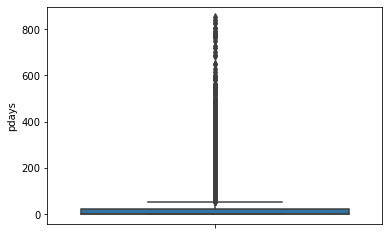

{'missing': 0,
 'min': -1,
 'max': 854,
 'mean': 51.33,
 'var': 11828.36,
 'std': 108.76,
 'range': 855,
 'q1': -1.0,
 'q2': -1.0,
 'q3': 20.75,
 'skewness': 2.45,
 'kurtosis': 6.84}

In [124]:
#  'pdays', 'previous', 'deposit'
univariate_num(data=bank, x="pdays")

<AxesSubplot:xlabel='pdays', ylabel='count'>

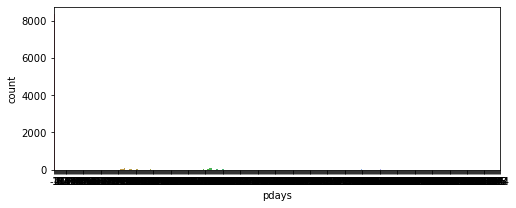

In [125]:
plt.figure(figsize=(8,3))
sns.countplot(data=bank, x="pdays")

In [126]:
bank["pdays"].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [127]:
bank.loc[bank["pdays"]==-1, "pdays"]=999

bank["recent_pdays"]=1/bank["pdays"]

bank.drop(columns=["pdays"], inplace=True)

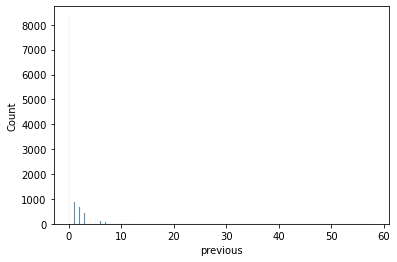

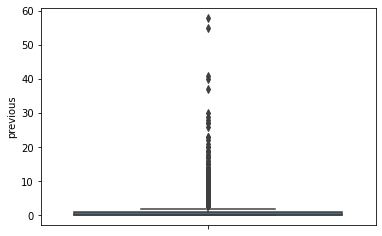

{'missing': 0,
 'min': 0,
 'max': 58,
 'mean': 0.83,
 'var': 5.25,
 'std': 2.29,
 'range': 58,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 7.34,
 'kurtosis': 106.2}

In [128]:
univariate_num(data=bank, x="previous")

## bivariate analysis

In [129]:
# # cat-cat
# cat-num
# num-num

In [130]:
pd.crosstab(bank["job"],bank["deposit"])

deposit,0,1
job,,
blue-collar,1236,708
others,544,1021
pink-collar,719,478
self-depend,423,310
technician,983,840
white-collar,1968,1932


In [131]:
pd.crosstab(bank["job"],bank["deposit"], normalize="index")

deposit,0,1
job,,
blue-collar,0.635802,0.364198
others,0.347604,0.652396
pink-collar,0.600668,0.399332
self-depend,0.577080,0.422920
technician,0.539221,0.460779
white-collar,0.504615,0.495385


In [132]:
bank.dtypes[bank.dtypes=="object"].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'poutcome'],
      dtype='object')

In [133]:
pd.crosstab(bank["marital"],bank["deposit"], normalize="index")

deposit,0,1
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


In [134]:
pd.crosstab(bank["education"],bank["deposit"], normalize="index")

deposit,0,1
education,,
primary,0.606000,0.394000
secondary,0.552593,0.447407
tertiary,0.458932,0.541068
unknown,0.492958,0.507042


In [135]:
# 'default', 'housing', 'loan', 'month', 'poutcome'
pd.crosstab(bank["default"],bank["deposit"], normalize="index")

deposit,0,1
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


In [136]:
# 'default', 'housing', 'loan', 'month', 'poutcome'
pd.crosstab(bank["housing"],bank["deposit"], normalize="index")

deposit,0,1
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


In [137]:
# 'default', 'housing', 'loan', 'month', 'poutcome'
pd.crosstab(bank["loan"],bank["deposit"], normalize="index")

deposit,0,1
loan,,
no,0.504741,0.495259
yes,0.668493,0.331507


In [138]:
# 'default', 'housing', 'loan', 'month', 'poutcome'
pd.crosstab(bank["month"],bank["deposit"], normalize="index")

deposit,0,1
month,,
apr,0.374865,0.625135
aug,0.547070,0.452930
dec,0.090909,0.909091
feb,0.431701,0.568299
jan,0.587209,0.412791
jul,0.585865,0.414135
jun,0.553191,0.446809
mar,0.101449,0.898551
may,0.672450,0.327550


In [139]:
# 'default', 'housing', 'loan', 'month', 'poutcome'
pd.crosstab(bank["poutcome"],bank["deposit"], normalize="index")

deposit,0,1
poutcome,,
failure,0.496743,0.503257
other,0.583324,0.416676
success,0.086835,0.913165


In [140]:
#cat-num

In [141]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

In [142]:
bank.groupby(["deposit"]).agg({"age":["min", "mean","median","max","std","count"]})

age                                       
        min       mean median max        std count
deposit                                           
0        18  40.837391   39.0  89  10.264815  5873
1        18  41.670070   38.0  95  13.497781  5289

<AxesSubplot:xlabel='deposit'>

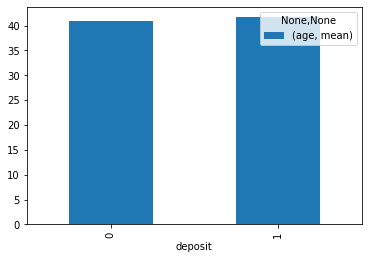

In [143]:
bank.groupby(["deposit"]).agg({"age":["mean"]}).plot(kind="bar")

In [144]:
from scipy import stats

In [145]:
# null hypo: avg_age_(non deposit)=avg_age_(deposit)
# alter hypo: avg_age_(non deposit)!=avg_age_(deposit)
# tests: two sample t test
# CI: 95%
# alpha: 0.05 
# decision Rule:
#     if p value >= Alpha:null is accepted
#         p value<= Alpha:null is rejected and alternative is accepted

In [146]:
dp=bank[bank["deposit"]==1]
ndp=bank[bank["deposit"]==0]

In [147]:
stats.ttest_ind(dp["age"], ndp["age"])

Ttest_indResult(statistic=3.6892130272779955, pvalue=0.00022601800590796526)

## outlier treatment

### tuckey method

In [148]:
var="balance"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap,upper_cap,bank[var])
bank[var]=np.where(bank[var]<=lower_cap,lower_cap,bank[var])

<AxesSubplot:ylabel='balance'>

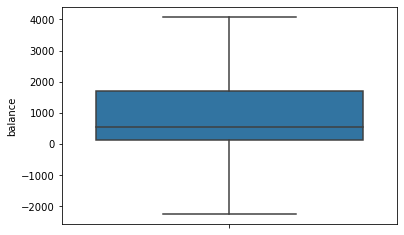

In [149]:
sns.boxplot(data=bank,y="balance")

<AxesSubplot:ylabel='duration'>

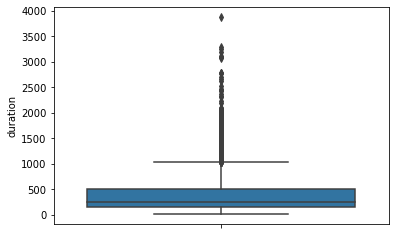

In [150]:
sns.boxplot(data=bank,y="duration")

In [151]:
var="duration"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap,upper_cap,bank[var])
bank[var]=np.where(bank[var]<=lower_cap,lower_cap,bank[var])

<AxesSubplot:ylabel='duration'>

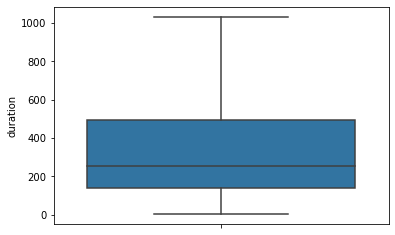

In [152]:
sns.boxplot(data=bank,y="duration")

In [153]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'poutcome',
       'deposit', 'recent_pdays'],
      dtype='object')

<AxesSubplot:ylabel='recent_pdays'>

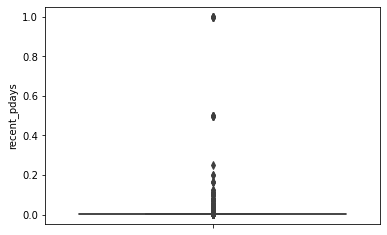

In [154]:
sns.boxplot(data=bank,y="recent_pdays")

In [155]:
var="recent_pdays"
q1=bank[var].quantile(.25)
q3=bank[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)

bank[var]=np.where(bank[var]>=upper_cap,upper_cap, bank[var])
bank[var]=np.where(bank[var]<=lower_cap,lower_cap, bank[var])

<AxesSubplot:ylabel='recent_pdays'>

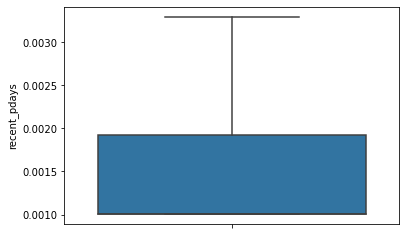

In [156]:
sns.boxplot(data=bank,y="recent_pdays")

## dummies

In [157]:
bank1=pd.get_dummies(data=bank, drop_first=True)

In [158]:
bank1.head()

,age,balance,duration,campaign,previous,deposit,recent_pdays,job_others,job_pink-collar,job_self-depend,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,59,2343.0,1033.0,1,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,56,45.0,1033.0,1,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,41,1270.0,1033.0,1,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,55,2476.0,579.0,1,0,1,0.001001,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,54,184.0,673.0,2,0,1,0.001001,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [163]:
bank1.shape

(11162, 33)

In [164]:
bank1.to_csv(r"D:\imaticus.csv")

## model development

In [72]:
x=bank1.drop(columns=["deposit"])
y=bank1["deposit"]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("train accuracy",round(dt.score(x_train,y_train),3))
print("test accuracy",round(dt.score(x_test,y_test),3))

train accuracy 1.0
test accuracy 0.753


In [76]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes","no"]

# setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5,5), dpi=500)

dt_plot=plot_tree(dt,
            feature_names= fn,
            class_names=cn,
            filled=True);

Error in callback <function flush_figures at 0x00000173D0B52A60> (for post_execute):


KeyboardInterrupt: 

***
* our model is overfitting as train results are farbetter that test
* to avoid overfitting: 
           * make model simple(control the parameters)
           * cross validation

In [77]:
dt1=DecisionTreeClassifier(max_depth=6)
dt1.fit(x_train,y_train)

print("train accuracy",round(dt1.score(x_train,y_train),3))
print("test accuracy",round(dt1.score(x_test,y_test),3))

train accuracy 0.812
test accuracy 0.799


In [78]:
dt1=DecisionTreeClassifier(min_samples_split=150)
dt1.fit(x_train,y_train)

print("train accuracy :"+str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

train accuracy :83.8%
test accuracy :81.0%


In [79]:
dt1=DecisionTreeClassifier(min_samples_leaf=50)
dt1.fit(x_train,y_train)

print("train accuracy :"+str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

train accuracy :82.89999999999999%
test accuracy :81.10000000000001%


In [80]:
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

print("train accuracy :"+str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

train accuracy :100.0%
test accuracy :76.5%


In [81]:
dt1=DecisionTreeClassifier(criterion="gini")
dt1.fit(x_train,y_train)

print("train accuracy :"+str(round(dt1.score(x_train,y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt1.score(x_test,y_test),3)*100)+str('%'))

train accuracy :100.0%
test accuracy :75.3%


### grid search : parameter tunning

In [82]:
criterion=["gini","entropy"]
max_depth=range(5,20,2)
min_sample_split=[10,15,20,50,100,200,250]
min_sample_leaf=[5,10,15,20,50,80,100]

In [83]:
2*8*7*7

784

In [84]:
iter criterian  depth  split   leaf  Accuracy
0      gini       5      10      5     65%
1      gini       5      10      10    64%
2      gini       5      10      15    67%
3      gini       5      10      20    58%
4      gini       5      10      50    59%
5      gini       5      10      80    68%

SyntaxError: invalid syntax (1629821412.py, line 1)

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    "criterion":["gini","entropy"],
"max_depth":[5,7,9,10,11],
"min_samples_split":[10,15,20,50,100,200,250],
"min_samples_leaf":[5,10,15,20,50,80,100]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg,param_grid=params, cv=10, n_jobs=-1, verbose=2)

gd_search.fit(x_train,y_train)

In [ ]:
# cv=cross validation=10
# 10000= 1000*10

In [ ]:
gd_search.best_params_

In [ ]:
gd_search.best_score_

In [ ]:
gd_search.best_estimator_

In [ ]:
# pd.DataFrame(gd_search.cv_results_)

In [ ]:
dt_f=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=100)
dt_f.fit(x_train,y_train)

In [ ]:
print("train accuracy :"+str(round(dt_f.score(x_train,y_train),3)*100)+str('%'))
print("test accuracy :"+str(round(dt_f.score(x_test,y_test),3)*100)+str('%'))

In [ ]:
from sklearn.tree import plot_tree
fn=x_train.columns
cn=["yes","no"]

# setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5,5), dpi=500)

dt_plot=plot_tree(dt_f,
            feature_names= fn,
            class_names=cn,
            filled=True);

In [ ]:
from sklearn.tree import export_text
rules=export_text(dt_f, feature_names=x_train.columns.to_list())
print(rules)

### feature importance

In [ ]:
dt_f.feature_importances_

In [ ]:
feat_imp=pd.DataFrame({"variable":x_train.columns,
             "imp":dt_f.feature_importances_}).sort_values(by="imp", ascending=False)

In [ ]:
feat_imp

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=feat_imp.head(10),x="variable",y="imp")

In [ ]:
feat_imp[feat_imp["imp"]>=.01]["variable"].unique()

In [ ]:
x_train1=x_train[['duration', 'poutcome_success', 'housing_yes', 'balance', 'age',
       'month_may', 'month_mar', 'campaign', 'previous', 'month_oct',
       'loan_yes', 'month_jul', 'recent_pdays']]

x_test1=x_test[['duration', 'poutcome_success', 'housing_yes', 'balance', 'age',
       'month_may', 'month_mar', 'campaign', 'previous', 'month_oct',
       'loan_yes', 'month_jul', 'recent_pdays']]

In [ ]:
dt_f=DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=100)
dt_f.fit(x_train1,y_train)
print("train accuracy",round(dt_f.score(x_train1,y_train),3))
print("test accuracy",round(dt_f.score(x_test1,y_test),3))

In [ ]:
pred_train=dt_f.predict(x_train1)
pred_test=dt_f.predict(x_test1)

In [ ]:
prob_train_1=dt_f.predict_proba(x_train1)[:,1]
prob_test_1=dt_f.predict_proba(x_test1)[:,1]

In [ ]:
metrics.accuracy_score(y_train,pred_train)
metrics.accuracy_score(y_test,pred_test)

In [ ]:
metrics.recall_score(y_train,pred_train)
metrics.recall_score(y_test,pred_test)

In [ ]:
metrics.precision_score(y_train,pred_train)
metrics.precision_score(y_test,pred_test)

In [ ]:
metrics.f1_score(y_train,pred_train)
metrics.f1_score(y_test,pred_test)

In [ ]:
metrics.roc_auc_score(y_train,pred_train)

In [ ]:
def classification_eva(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    roc1=metrics.roc_auc_score(act,pred)
    result={"Accuracy":ac1,"Recall":rc1,"precision":pc1,"f1 score":f1,"Auc":roc1}
    
    fpr,tpr, threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show
    return result

In [ ]:
classification_eva(y_train,pred_train, probs=prob_train_1)

In [ ]:
classification_eva(y_test,pred_test,probs=prob_test_1)

In [ ]:

def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

## Random forest

In [ ]:
x=bank1.drop(columns=["deposit"])
y=bank1["deposit"]

In [ ]:
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=.3,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

In [ ]:
print("Train Accuracy :", rf.score(x_train, y_train))
print("Test Accuracy :" , rf.score(x_test, y_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# params={"n_estimators":[100,150,200,250,300],
#        "criterion":["gini","entropy"],
#        "max_depth":[5,7,9,11,15,17],
#        "min_samples_split":[10,20,50,100,200],
#        "min_samples_leaf":[5,10,15,20,30,50],
#        "max_features":["sqrt","log2"],
#        "bootstrap"=[True,False]}

In [ ]:
import time

In [ ]:
tic=time.time()

params={"n_estimators":[100,150,200],
       "criterion":["gini","entropy"],
       "max_depth":[7,9,11,15],
       "min_samples_split":[50,100,200],
       "min_samples_leaf":[5,10,15,20],
       "max_features":["sqrt","log2"],
       "bootstrap":[True]}
rf1=RandomForestClassifier(random_state=0)
gs_rf=GridSearchCV(estimator=rf1,param_grid=params, cv=10, n_jobs=-1, verbose=1)
gs_rf.fit(x_train,y_train)
toc=time.time()
print("total time taken", toc-tic)

In [ ]:
gs_rf.best_score_

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.best_estimator_

In [ ]:
rff=RandomForestClassifier(n_estimators=100, criterion="gini",
                      max_depth=15,
                      min_samples_split=50,
                      min_samples_leaf=5,
                      max_features="sqrt",
                      bootstrap=True)

In [ ]:
rff.fit(x_train,y_train)

In [ ]:
print("Train Accuracy :", rff.score(x_train, y_train))
print("Test Accuracy :",rff.score(x_test,y_test))

## Feature importance

In [ ]:
pd.DataFrame({"var":x_train.columns, "imp":rff.feature_importances_}).sort_values(by="imp", ascending=False)

## model evaluation

In [ ]:
pred_train=rff.predict(x_train)
pred_test=rff.predict(x_test)

In [ ]:
prob_train_1=rff.predict_proba(x_train)[:,1]
prob_test_1=rff.predict_proba(x_test)[:,1]

In [ ]:
classification_eva(act=y_train,pred=pred_train,probs=prob_train_1)

In [ ]:
classification_eva(y_test,pred_test,prob_test_1)

## Xgboost